In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.feature_selection import mutual_info_classif,SelectKBest, f_classif
from sklearn import linear_model,svm
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')
wd = "drive/MyDrive/stat 451 project/"


Mounted at /content/drive


In [3]:
df = pd.read_csv(wd + "project.csv")

In [ ]:
# print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Data Types:
year                      int64
gender                   object
age                     float64
location                 object
race:AfricanAmerican      int64
race:Asian                int64
race:Caucasian            int64
race:Hispanic             int64
race:Other                int64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
hbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
clinical_notes           object
dtype: object

Missing Values:
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes              

In [ ]:
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
                         count         mean        std      min      25%  \
year                  100000.0  2018.360820   1.345239  2015.00  2019.00   
age                   100000.0    41.885856  22.516840     0.08    24.00   
race:AfricanAmerican  100000.0     0.202230   0.401665     0.00     0.00   
race:Asian            100000.0     0.200150   0.400114     0.00     0.00   
race:Caucasian        100000.0     0.198760   0.399069     0.00     0.00   
race:Hispanic         100000.0     0.198880   0.399160     0.00     0.00   
race:Other            100000.0     0.199980   0.399987     0.00     0.00   
hypertension          100000.0     0.074850   0.263150     0.00     0.00   
heart_disease         100000.0     0.039420   0.194593     0.00     0.00   
bmi                   100000.0    27.320767   6.636783    10.01    23.63   
hbA1c_level           100000.0     5.527507   1.070672     3.50     4.80   
blood_glucose_level   100000.0   138.058060  40.708136    80.00   1

In [ ]:

# target variable distribution
print("\nDiabetes Distribution:")
diabetes_counts = df['diabetes'].value_counts(normalize=True) * 100
print(diabetes_counts)


Diabetes Distribution:
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


Text(0, 0.5, 'Count')

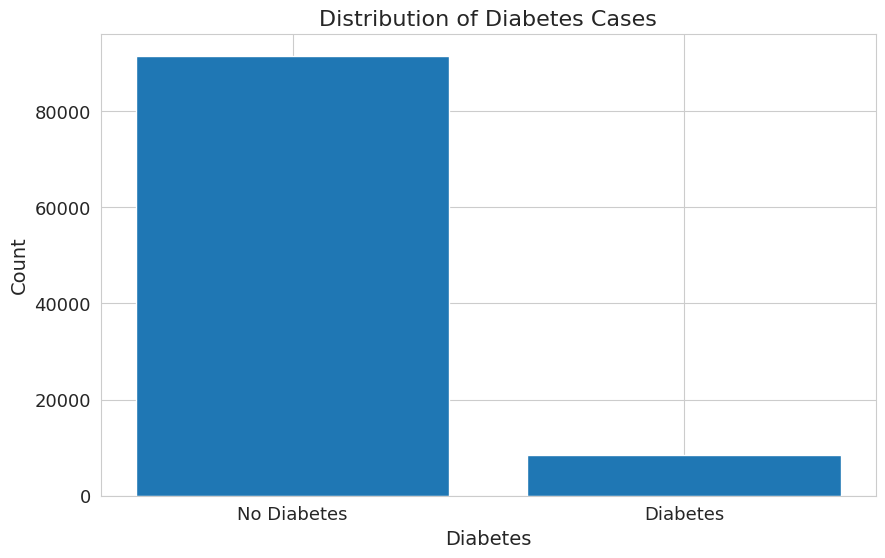

In [ ]:
plt.figure(figsize=(10, 6))
diabetes_values = df['diabetes'].value_counts().values
plt.bar(['No Diabetes', 'Diabetes'], diabetes_values)
plt.title('Distribution of Diabetes Cases', fontsize=16)
plt.xlabel('Diabetes', fontsize=14)
plt.ylabel('Count', fontsize=14)

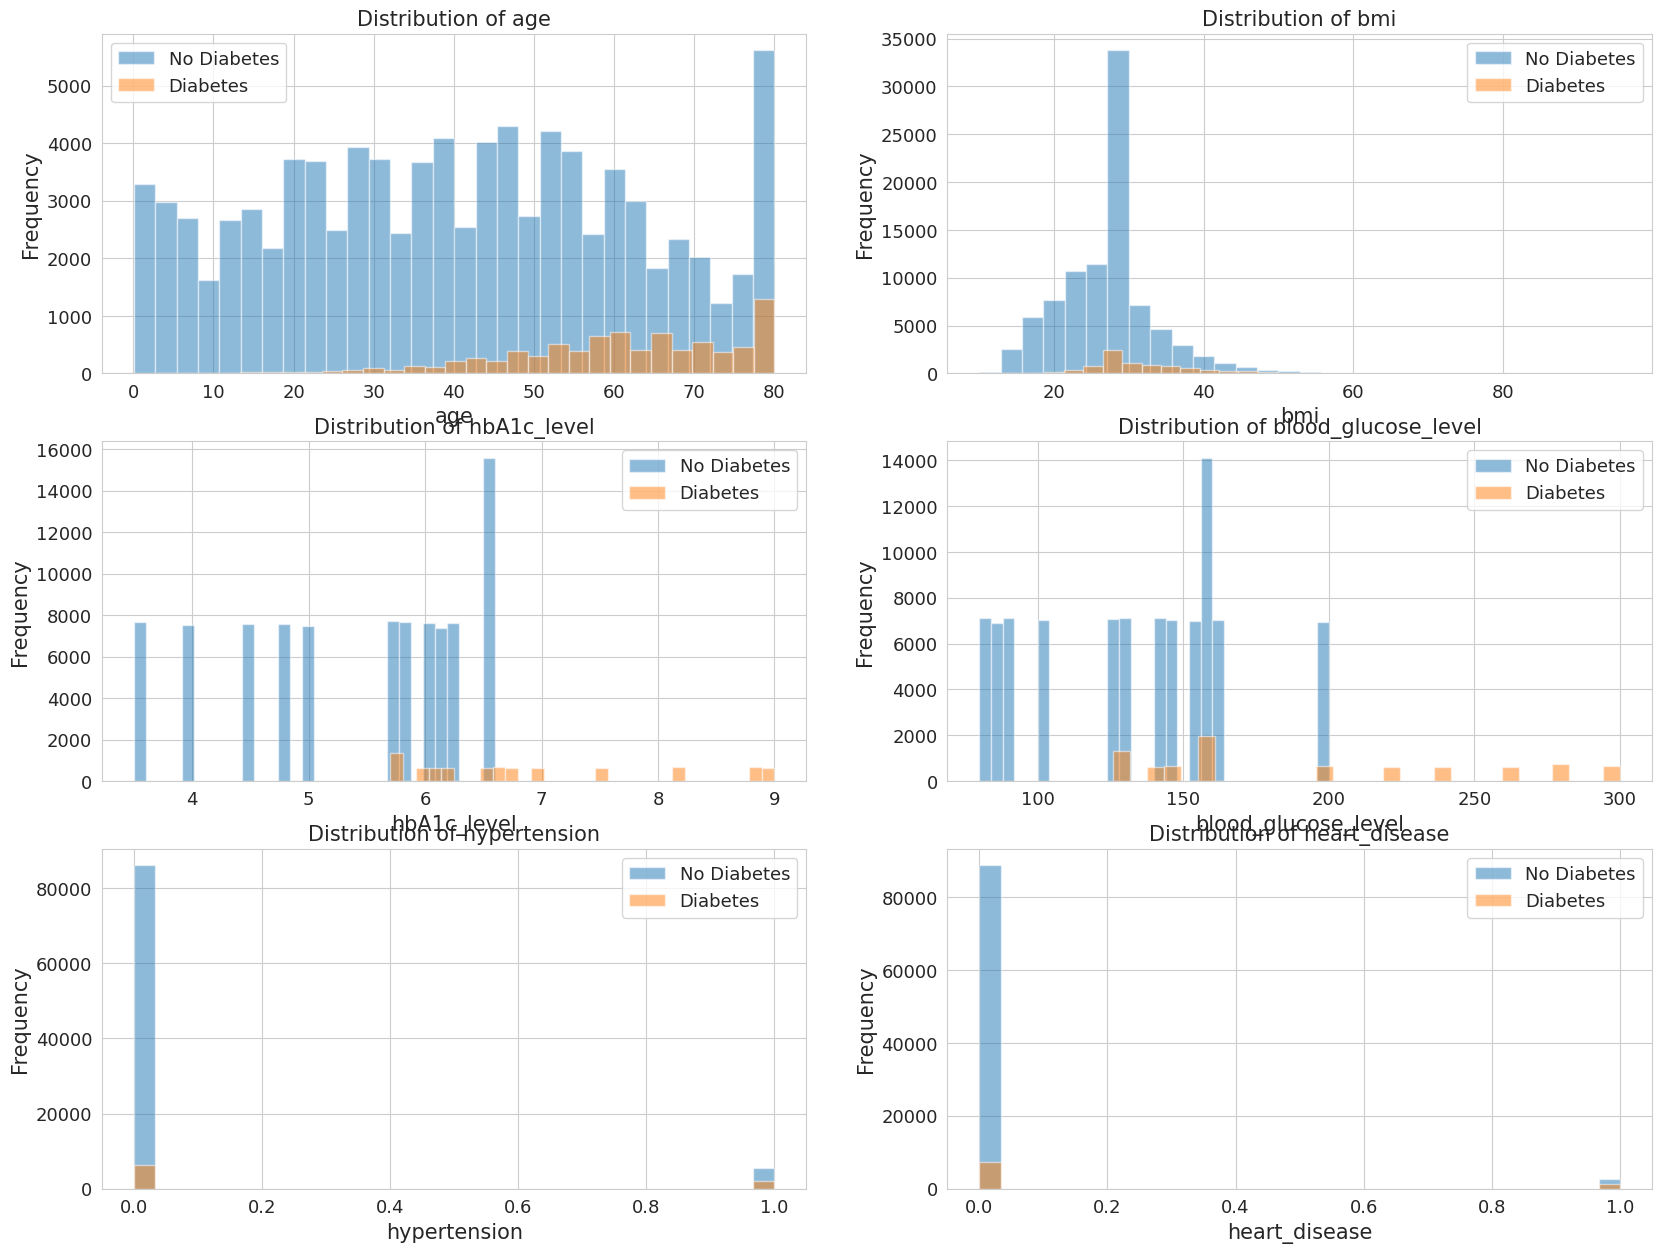

In [ ]:
numerical_features = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    diabetic_values = df[df['diabetes'] == 1][feature]
    non_diabetic_values = df[df['diabetes'] == 0][feature]
    plt.hist(non_diabetic_values, bins=30, alpha=0.5, label='No Diabetes')
    plt.hist(diabetic_values, bins=30, alpha=0.5, label='Diabetes')
    plt.title(f'Distribution of {feature}',fontsize=15)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.legend()


In [ ]:
# most important predictors
df_original = df.copy()

# Convert gender to numeric
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 0})

# One-hot encode smoking_history ONCE
smoking_dummies = pd.get_dummies(df['smoking_history'], prefix='smoking')
df = pd.concat([df, smoking_dummies], axis=1)
df.drop('smoking_history', axis=1, inplace=True)

# Remove non-numeric columns for analysis
non_numeric_cols = ['location', 'clinical_notes']
df_numeric = df.drop(non_numeric_cols, axis=1)

X = df_numeric.drop('diabetes', axis=1)
y = df_numeric['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



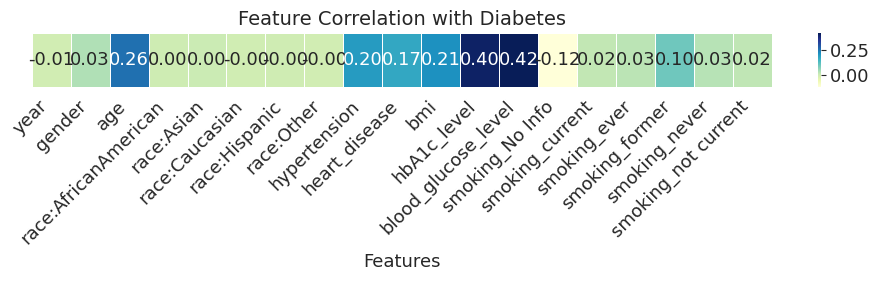

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)


df_corr = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)


corr_matrix = df_corr.corr()

corr_target = corr_matrix["diabetes"].drop("diabetes")



corr_df = corr_target.to_frame(name="Correlation with Diabetes").T

plt.figure(figsize=(10, 3))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=True,
    linewidths=0.5
)

plt.title("Feature Correlation with Diabetes", fontsize=14)
plt.xlabel("Features")
plt.yticks([])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()
plt.savefig('feature_diabetes_correlation_horizontal.png', dpi=300, bbox_inches='tight')


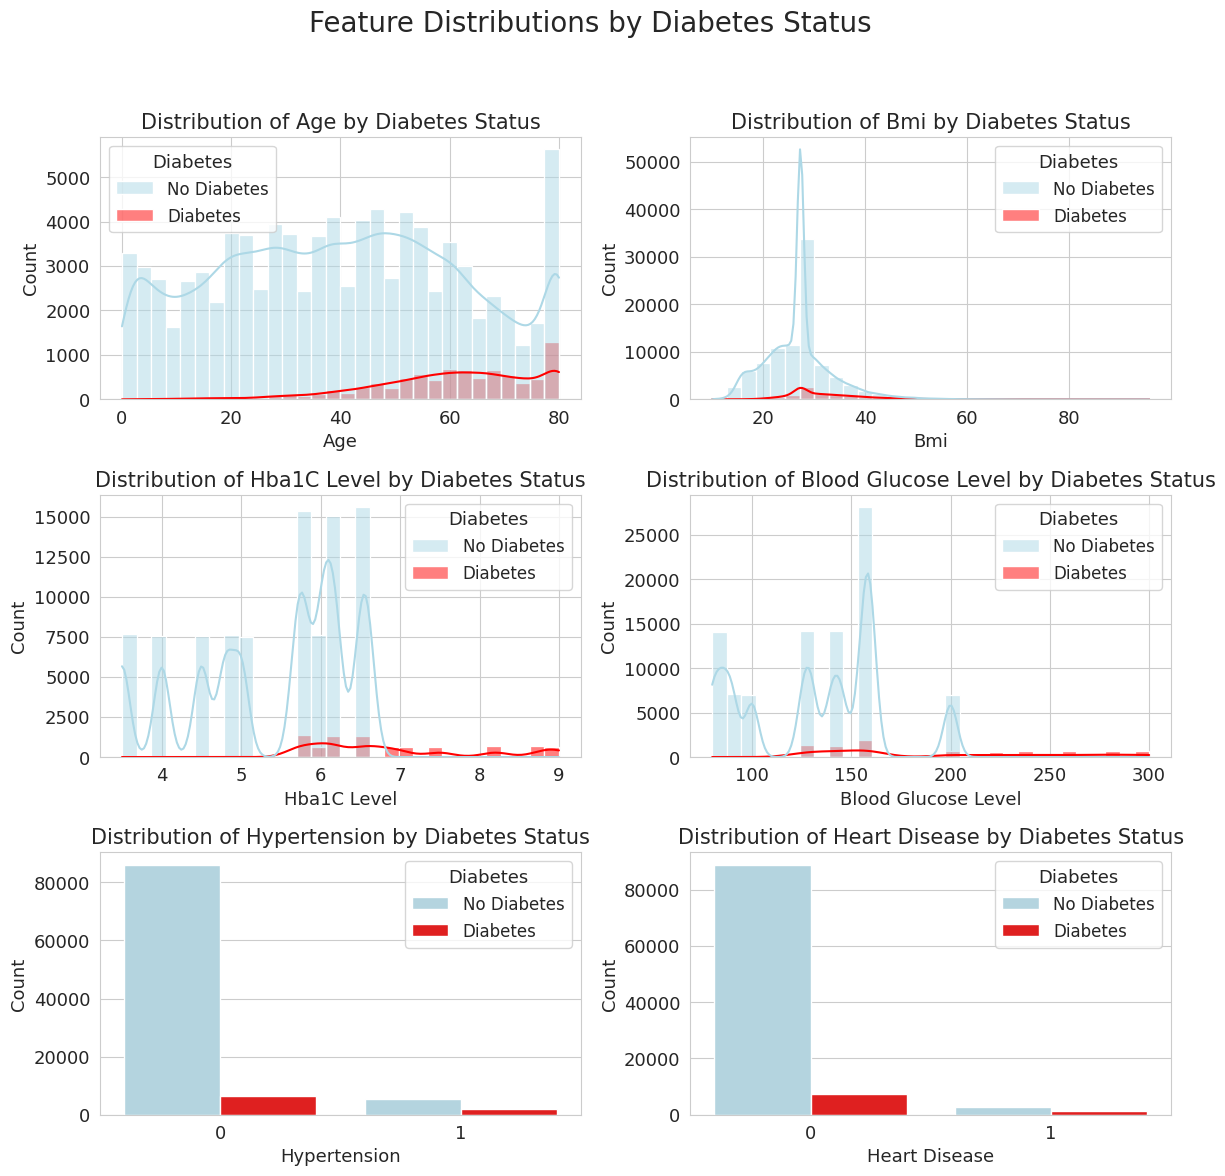

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df1=df

df1['diabetes'] = df1['diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})


custom_palette = {'Diabetes': 'red', 'No Diabetes': 'lightblue'}


sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 13})

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Feature Distributions by Diabetes Status", fontsize=20)

continuous_vars = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
for i, var in enumerate(continuous_vars):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df1, x=var, hue='diabetes', kde=True, bins=30,
                 palette=custom_palette, alpha=0.5, ax=ax)

    ax.set_title(f"Distribution of {var.replace('_', ' ').title()} by Diabetes Status", fontsize=15)
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=13)
    ax.set_ylabel("Count", fontsize=13)


    legend = ax.get_legend()
    if legend:
        legend.set_title("Diabetes")
        for text in legend.get_texts():
            text.set_fontsize(12)
        legend.get_title().set_fontsize(13)


categorical_vars = ['hypertension', 'heart_disease']
for i, var in enumerate(categorical_vars):
    ax = axes[2, i]
    sns.countplot(data=df1, x=var, hue='diabetes', palette=custom_palette, ax=ax)

    ax.set_title(f"Distribution of {var.replace('_', ' ').title()} by Diabetes Status", fontsize=15)
    ax.set_xlabel(var.replace('_', ' ').title(), fontsize=13)
    ax.set_ylabel("Count", fontsize=13)

    legend = ax.get_legend()
    if legend:
        legend.set_title("Diabetes")
        for text in legend.get_texts():
            text.set_fontsize(12)
        legend.get_title().set_fontsize(13)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### HeatMap

In [ ]:
selected_features = [
    'blood_glucose_level',
    'hbA1c_level',
    'age',
    'bmi',
    'hypertension',
    'heart_disease'
]
X = df[selected_features]
y = df['diabetes']

# First split: 80% train, 20% remaining
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: Split the remaining 20% into validation and test (50% each, so 10% of original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Check the proportions to verify the stratification
print(f"Train set diabetes proportion: {y_train.mean():.4f}")
print(f"Validation set diabetes proportion: {y_val.mean():.4f}")
print(f"Test set diabetes proportion: {y_test.mean():.4f}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Train set diabetes proportion: 0.0850
Validation set diabetes proportion: 0.0850
Test set diabetes proportion: 0.0850


<span style="color:red; font-size:24pt; font-weight:bold">Logistic model 1</span>

Model coefficients (w*): [1.281 2.33  0.964 0.565 0.19  0.148]
Model intercept (b*): -4.999
Accuracy: 0.9603

Validation Set Performance:
Accuracy: 0.9619

Test Set Performance:
Accuracy: 0.9592

Feature Importance:
               Feature  Coefficient
1          hbA1c_level        2.330
0  blood_glucose_level        1.281
2                  age        0.964
3                  bmi        0.565
4         hypertension        0.190
5        heart_disease        0.148

Training Set Assessment:

Confusion Matrix:
[[72653   547]
 [ 2629  4171]]

Validation Set Assessment:

Confusion Matrix:
[[9084   66]
 [ 315  535]]

Test Set Assessment:

Confusion Matrix:
[[9073   77]
 [ 331  519]]


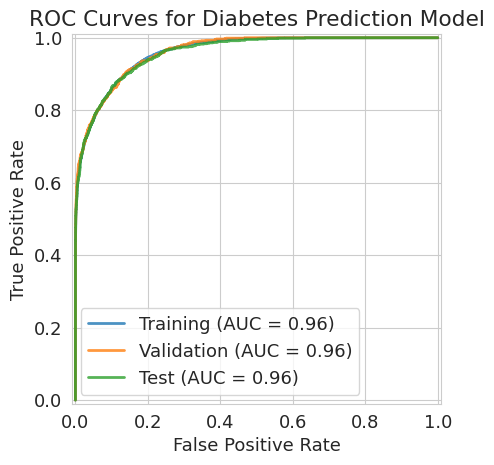

In [ ]:
model = linear_model.LogisticRegression(C=0.01,penalty="l1",solver='saga')
model.fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Model coefficients (w*):", model.coef_[0].round(3))
print("Model intercept (b*):", model.intercept_[0].round(3))
print(f"Accuracy: {model.score(X_train_scaled, y_train):.4f}")
# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {model.score(X_val_scaled, y_val):.4f}")
# Final evaluation on test set
y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {model.score(X_test_scaled, y_test):.4f}")
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0]
}).round(3).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)
for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]
    print(f"\n{name} Set Assessment:")

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    auc = roc_auc_score(y_true, y_prob)
    RocCurveDisplay.from_estimator(
        model,
        X_scaled,
        y_true,
        name=f"{name}",
        alpha=0.8,
        lw=2,
        ax=plt.gca()
    )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Prediction Model')
plt.legend()
plt.show()

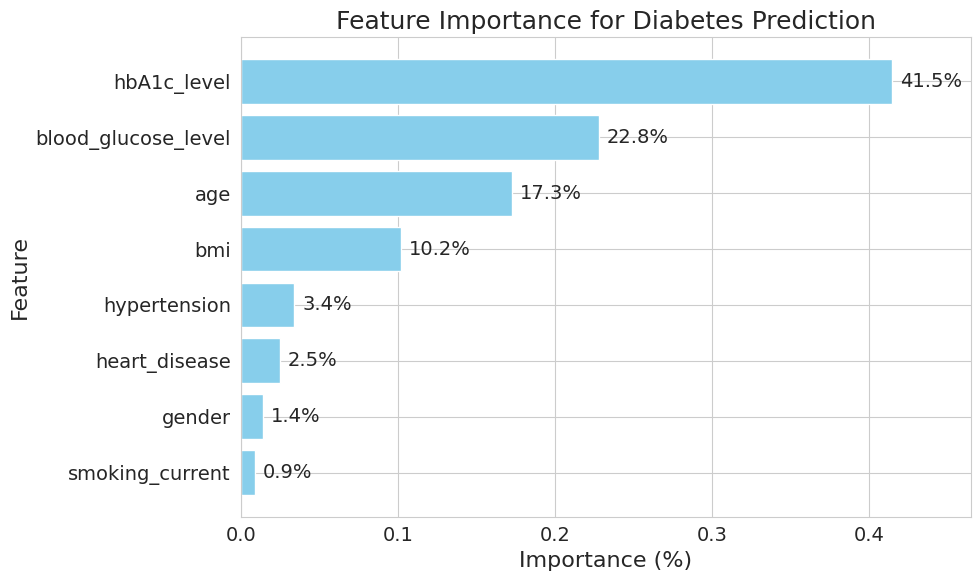

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

features = [
    'hbA1c_level',
    'blood_glucose_level',
    'age',
    'bmi',
    'hypertension',
    'heart_disease',
    'gender',
    'smoking_current'
]

importances = [
    0.415,
    0.228,
    0.173,
    0.102,
    0.034,
    0.025,
    0.014,
    0.009
]

data = {
    'Feature': features,
    'Importance': importances
}

df_sorted = pd.DataFrame(data).sort_values('Importance')

plt.figure(figsize=(10, 6))

bars = plt.barh(df_sorted['Feature'], df_sorted['Importance'], color='skyblue')

for bar in bars:
    width = bar.get_width()
    y_coord = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + 0.005,
        y_coord,
        f"{width * 100:.1f}%",
        va='center',
        fontsize=14  # 调整数字大小
    )

plt.xlabel('Importance (%)', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.title('Feature Importance for Diabetes Prediction', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, df_sorted['Importance'].max() + 0.05)
plt.tight_layout()
plt.show()



Logistics model 2

Model coefficients (w*): [1.35177884 2.52985418 1.04299185 0.61395479 0.2037191  0.15973843]
Model intercept (b*): -5.276642912428865
Accuracy: 0.9601

Validation Set Performance:
Accuracy: 0.9623

Test Set Performance:
Accuracy: 0.9580

Feature Importance:
               Feature  Coefficient
1          hbA1c_level        2.530
0  blood_glucose_level        1.352
2                  age        1.043
3                  bmi        0.614
4         hypertension        0.204
5        heart_disease        0.160

Training Set Assessment:

Confusion Matrix:
[[72554   646]
 [ 2549  4251]]

Validation Set Assessment:

Confusion Matrix:
[[9079   71]
 [ 306  544]]

Test Set Assessment:

Confusion Matrix:
[[9057   93]
 [ 327  523]]


Text(0.5, 1.0, 'ROC Curves for Diabetes Prediction Model')

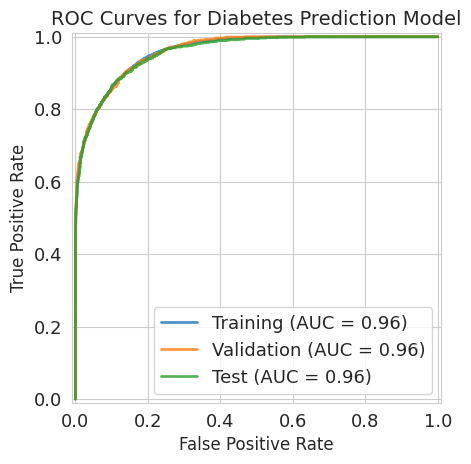

In [ ]:
model = linear_model.LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)
model.fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Model coefficients (w*):", model.coef_[0])
print("Model intercept (b*):", model.intercept_[0])
print(f"Accuracy: {model.score(X_train_scaled, y_train):.4f}")
# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {model.score(X_val_scaled, y_val):.4f}")
# Final evaluation on test set
y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {model.score(X_test_scaled, y_test):.4f}")
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_[0]
}).round(3).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)
for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]
    print(f"\n{name} Set Assessment:")

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    auc = roc_auc_score(y_true, y_prob)
    RocCurveDisplay.from_estimator(
        model,
        X_scaled,
        y_true,
        name=f"{name}",
        alpha=0.8,
        lw=2,
        ax=plt.gca()
    )
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Diabetes Prediction Model', fontsize=14)

<span style="color:red; font-size:24pt; font-weight:bold">Decision Tree 1</span>

Accuracy: 0.9718

Validation Set Performance:
Accuracy: 0.9731

Test Set Performance:
Accuracy: 0.9715

Classification Report (Test Set):

Training Set Assessment:

Confusion Matrix:
[[73200     0]
 [ 2259  4541]]

Validation Set Assessment:

Confusion Matrix:
[[9150    0]
 [ 269  581]]

Test Set Assessment:

Confusion Matrix:
[[9150    0]
 [ 285  565]]


Text(0.5, 1.0, 'ROC Curves for Diabetes Prediction Model')

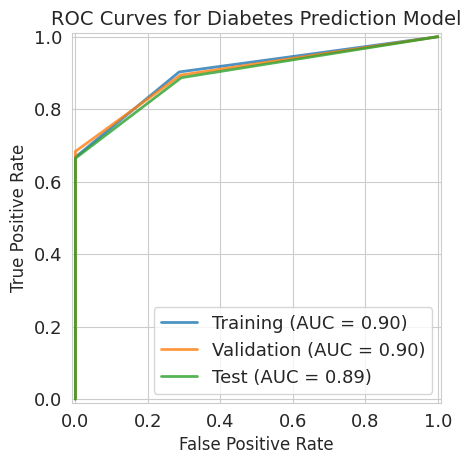

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2)
model.fit(X_train_scaled, y_train)

# Print Accuracy
print(f"Accuracy: {model.score(X_train_scaled, y_train):.4f}")
# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {model.score(X_val_scaled, y_val):.4f}")
y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {model.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report (Test Set):")
for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]
    print(f"\n{name} Set Assessment:")

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    auc = roc_auc_score(y_true, y_prob)
    RocCurveDisplay.from_estimator(
        model,
        X_scaled,
        y_true,
        name=f"{name}",
        alpha=0.8,
        lw=2,
        ax=plt.gca()
    )
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Diabetes Prediction Model', fontsize=14)

Decision Tree2

Accuracy: 0.9973

Validation Set Performance:
Accuracy: 0.9564

Test Set Performance:
Accuracy: 0.9554

Classification Report (Test Set):

Training Set Assessment:

Confusion Matrix:
[[73195     5]
 [  212  6588]]

Validation Set Assessment:

Confusion Matrix:
[[8936  214]
 [ 222  628]]

Test Set Assessment:

Confusion Matrix:
[[8945  205]
 [ 241  609]]


Text(0.5, 1.0, 'ROC Curves for Diabetes Prediction Model')

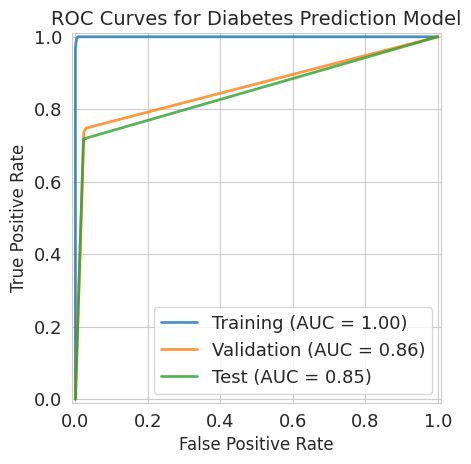

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_split=2)
model.fit(X_train_scaled, y_train)

# Print Accuracy
print(f"Accuracy: {model.score(X_train_scaled, y_train):.4f}")
# Evaluate on validation set
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {model.score(X_val_scaled, y_val):.4f}")
y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {model.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report (Test Set):")
for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]
    print(f"\n{name} Set Assessment:")

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    auc = roc_auc_score(y_true, y_prob)
    RocCurveDisplay.from_estimator(
        model,
        X_scaled,
        y_true,
        name=f"{name}",
        alpha=0.8,
        lw=2,
        ax=plt.gca()
    )
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Diabetes Prediction Model', fontsize=14)

<span style="color:red; font-size:24pt; font-weight:bold">SVM 1</span>

Accuracy (Training): 0.9693

Validation Set Performance:
Accuracy: 0.9698

Test Set Performance:
Accuracy: 0.9685

Training Set Assessment:
Confusion Matrix:
[[73160    40]
 [ 2419  4381]]
ROC AUC Score: 0.9360

Validation Set Assessment:
Confusion Matrix:
[[9141    9]
 [ 293  557]]
ROC AUC Score: 0.9334

Test Set Assessment:
Confusion Matrix:
[[9143    7]
 [ 308  542]]
ROC AUC Score: 0.9365


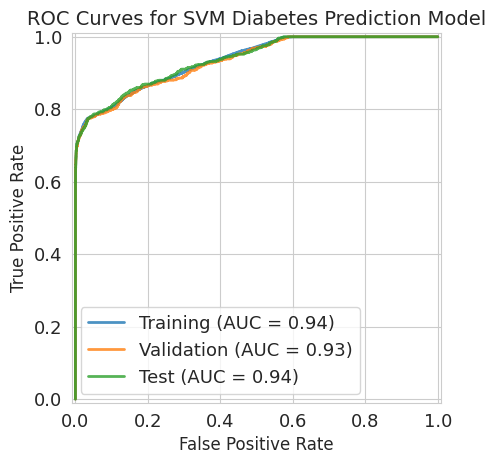

In [ ]:
model = svm.SVC(C=10, gamma='scale', kernel='rbf', probability=True,random_state=123)
model.fit(X_train_scaled, y_train)


print(f"Accuracy (Training): {model.score(X_train_scaled, y_train):.4f}")


y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]

    print(f"\n{name} Set Assessment:")


    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)


    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC Score: {auc:.4f}")


    RocCurveDisplay.from_estimator(
        model, X_scaled, y_true,
        name=f"{name}",
        alpha=0.8, lw=2, ax=plt.gca()
    )


plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for SVM Diabetes Prediction Model', fontsize=14)
plt.legend()
plt.show()


<span style="color:red; font-size:24pt; font-weight:bold">SVM 2
</span>

Accuracy (Training): 0.9693

Validation Set Performance:
Accuracy: 0.9698

Test Set Performance:
Accuracy: 0.9685

Training Set Assessment:
Confusion Matrix:
[[73160    40]
 [ 2419  4381]]
ROC AUC Score: 0.9360

Validation Set Assessment:
Confusion Matrix:
[[9141    9]
 [ 293  557]]
ROC AUC Score: 0.9334

Test Set Assessment:
Confusion Matrix:
[[9143    7]
 [ 308  542]]
ROC AUC Score: 0.9365


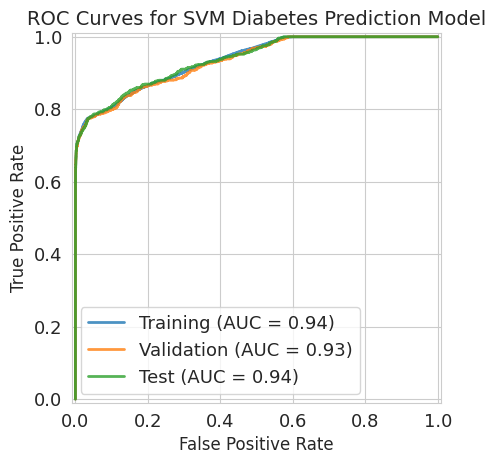

In [ ]:
model = svm.SVC(C=10, gamma= 'scale', kernel='rbf', probability=True,random_state=123)
model.fit(X_train_scaled, y_train)


print(f"Accuracy (Training): {model.score(X_train_scaled, y_train):.4f}")


y_val_pred = model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


y_test_pred = model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)[:, 1]

    print(f"\n{name} Set Assessment:")


    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)


    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC Score: {auc:.4f}")


    RocCurveDisplay.from_estimator(
        model, X_scaled, y_true,
        name=f"{name}",
        alpha=0.8, lw=2, ax=plt.gca()
    )


plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for SVM Diabetes Prediction Model', fontsize=14)
plt.legend()
plt.show()

<span style="color:red; font-size:24pt; font-weight:bold">KNN
1</span>

Accuracy (Training): 0.9707

Validation Set Performance:
Accuracy: 0.9674

Test Set Performance:
Accuracy: 0.9659

Training Set Assessment:
Confusion Matrix:
[[73006   194]
 [ 2147  4653]]
ROC AUC Score: 0.9876

Validation Set Assessment:
Confusion Matrix:
[[9112   38]
 [ 288  562]]
ROC AUC Score: 0.9234

Test Set Assessment:
Confusion Matrix:
[[9116   34]
 [ 307  543]]
ROC AUC Score: 0.9185


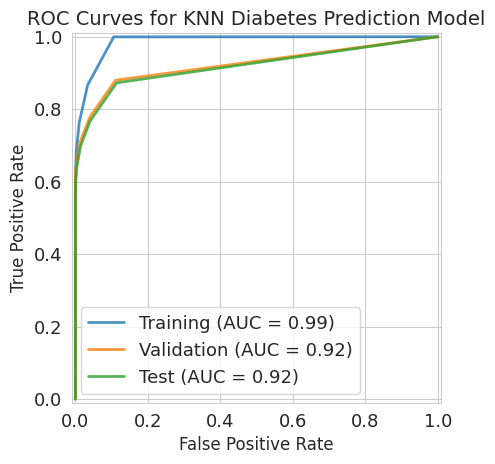

In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors=7, weights= 'uniform')
knn_model.fit(X_train_scaled, y_train)


print(f"Accuracy (Training): {knn_model.score(X_train_scaled, y_train):.4f}")


y_val_pred = knn_model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


y_test_pred = knn_model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = knn_model.predict(X_scaled)
    y_prob = knn_model.predict_proba(X_scaled)[:, 1]

    print(f"\n{name} Set Assessment:")


    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)


    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC Score: {auc:.4f}")


    RocCurveDisplay.from_estimator(
        knn_model, X_scaled, y_true,
        name=f"{name}",
        alpha=0.8, lw=2, ax=plt.gca()
    )


plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for KNN Diabetes Prediction Model', fontsize=14)
plt.legend()
plt.show()


<span style="color:red; font-size:24pt; font-weight:bold">KNN 2</span>

Accuracy (Training): 0.9972

Validation Set Performance:
Accuracy: 0.9643

Test Set Performance:
Accuracy: 0.9622

Training Set Assessment:
Confusion Matrix:
[[73179    21]
 [  203  6597]]
ROC AUC Score: 0.9982

Validation Set Assessment:
Confusion Matrix:
[[9046  104]
 [ 253  597]]
ROC AUC Score: 0.8928

Test Set Assessment:
Confusion Matrix:
[[9046  104]
 [ 274  576]]
ROC AUC Score: 0.8771


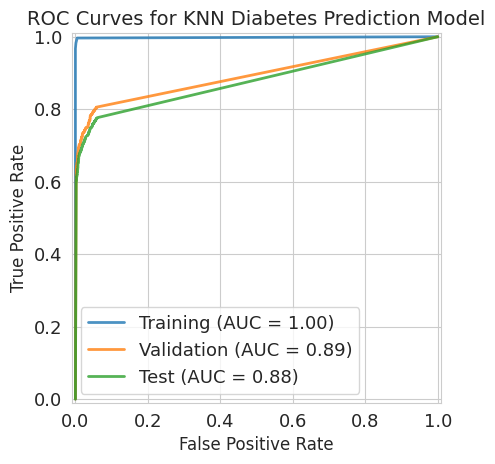

In [ ]:
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors= 3, weights='distance')
knn_model.fit(X_train_scaled, y_train)


print(f"Accuracy (Training): {knn_model.score(X_train_scaled, y_train):.4f}")


y_val_pred = knn_model.predict(X_val_scaled)
print("\nValidation Set Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")


y_test_pred = knn_model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


for name, X_scaled, y_true in [
    ("Training", X_train_scaled, y_train),
    ("Validation", X_val_scaled, y_val),
    ("Test", X_test_scaled, y_test)
]:
    y_pred = knn_model.predict(X_scaled)
    y_prob = knn_model.predict_proba(X_scaled)[:, 1]

    print(f"\n{name} Set Assessment:")


    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)


    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC AUC Score: {auc:.4f}")


    RocCurveDisplay.from_estimator(
        knn_model, X_scaled, y_true,
        name=f"{name}",
        alpha=0.8, lw=2, ax=plt.gca()
    )


plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for KNN Diabetes Prediction Model', fontsize=14)
plt.legend()
plt.show()

# Hyper Parameter Tuning Part

In [ ]:
#Logistic Regression hyperparameter tuning 1
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_logistic, cv=3, scoring='accuracy', n_jobs=-1, verbose=2
)
logistic_grid_search.fit(X_train_scaled, y_train)

print("Logistic Best Params:", logistic_grid_search.best_params_)
print("Logistic Best CV Accuracy:", logistic_grid_search.best_score_)
print("Logistic Validation Accuracy:", logistic_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Logistic Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Logistic Best CV Accuracy: 0.9602499877999255
Logistic Validation Accuracy: 0.9619


In [ ]:
#Logistic Regression hyperparameter tuning 2
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_logistic, cv=3, scoring='recall', n_jobs=-1, verbose=2
)
logistic_grid_search.fit(X_train_scaled, y_train)

print("Logistic Best Params:", logistic_grid_search.best_params_)
print("Logistic Best CV Accuracy:", logistic_grid_search.best_score_)
print("Logistic Validation Accuracy:", logistic_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Logistic Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Best CV Accuracy: 0.6245567957466407
Logistic Validation Accuracy: 0.9623


In [ ]:
#Decision Tree hyperparameter tuning 1
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree, cv=3, scoring='accuracy', n_jobs=-1, verbose=2
)
tree_grid_search.fit(X_train_scaled, y_train)

print("Tree Best Params:", tree_grid_search.best_params_)
print("Tree Best CV Accuracy:", tree_grid_search.best_score_)
print("Tree Validation Accuracy:", tree_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tree Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Tree Best CV Accuracy: 0.9717624882722792
Tree Validation Accuracy: 0.9731


In [ ]:
#Decision Tree hyperparameter tuning 2
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree, cv=3, scoring='recall', n_jobs=-1, verbose=2
)
tree_grid_search.fit(X_train_scaled, y_train)

print("Tree Best Params:", tree_grid_search.best_params_)
print("Tree Best CV Accuracy:", tree_grid_search.best_score_)
print("Tree Validation Accuracy:", tree_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tree Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Tree Best CV Accuracy: 0.7360265019953843
Tree Validation Accuracy: 0.9564


In [ ]:
#SVM hyperparameter tuning 1
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf']
}

svm_grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1, verbose=2
)
svm_grid_search.fit(X_train_scaled, y_train)

print("SVM Best Params:", svm_grid_search.best_params_)
print("SVM Best CV Accuracy:", svm_grid_search.best_score_)
print("SVM Validation Accuracy:", svm_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best CV Accuracy: 0.9677374748333535
SVM Validation Accuracy: 0.9698


In [ ]:
#SVM hyperparameter tuning 2
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf']
}

svm_grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm, cv=3, scoring='recall', n_jobs=-1, verbose=2
)
svm_grid_search.fit(X_train_scaled, y_train)

print("SVM Best Params:", svm_grid_search.best_params_)
print("SVM Best CV Accuracy:", svm_grid_search.best_score_)
print("SVM Validation Accuracy:", svm_grid_search.best_estimator_.score(X_val_scaled, y_val))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Best CV Accuracy: 0.6317619430090041
SVM Validation Accuracy: 0.9698


In [ ]:
#KNN hyperparameter tuning 1
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(metric='manhattan', n_neighbors= 9, weights='uniform'),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)


knn_grid_search.fit(X_train_scaled, y_train)


print("KNN Best Params:", knn_grid_search.best_params_)
print( "KNN Best CV Accuracy:", knn_grid_search.best_score_)


best_knn = knn_grid_search.best_estimator_
val_acc_knn = best_knn.score(X_val_scaled, y_val)
print(f"KNN Validation Accuracy: {val_acc_knn:.4f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
KNN Best CV Accuracy: 0.9658249762390234
KNN Validation Accuracy: 0.9677


In [ ]:
#KNN hyperparameter tuning 2
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(metric='manhattan',n_neighbors= 3, weights='distance'),
    param_grid=param_grid_knn,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=-1
)


knn_grid_search.fit(X_train_scaled, y_train)


print("KNN Best Params:", knn_grid_search.best_params_)
print( "KNN Best CV Accuracy:", knn_grid_search.best_score_)


best_knn = knn_grid_search.best_estimator_
val_acc_knn = best_knn.score(X_val_scaled, y_val)
print(f"KNN Validation Accuracy: {val_acc_knn:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Best CV Accuracy: 0.6774979745074092
KNN Validation Accuracy: 0.9636


By examining its learning curve to detect overfitting, each model was selected based on achieving the highest validation accuracy within its class.

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy',
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training accuracy")
    plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation accuracy")
    plt.title('Learning Curve',fontsize=25)
    plt.xlabel('Training Set Size',fontsize=25)
    plt.ylabel('Accuracy',fontsize=25)
    plt.legend(loc="best",fontsize=20)
    plt.grid(True)
    plt.show()

logistic model curve

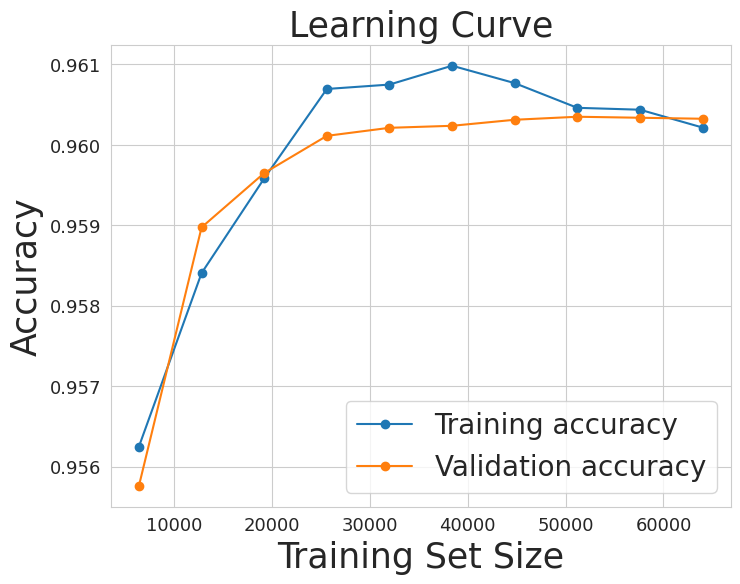

In [ ]:
logistic_modelmodel = linear_model.LogisticRegression(C=0.01,penalty="l1",solver='saga')
plot_learning_curve(logistic_modelmodel, X_train_scaled, y_train)

decision tree curve

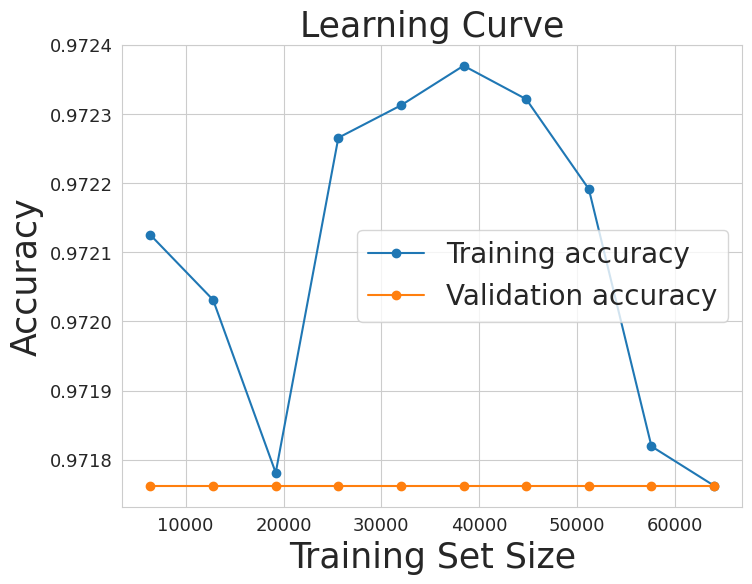

In [ ]:
decision_tree_model=DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2)
plot_learning_curve(decision_tree_model, X_train_scaled, y_train)

SVM curve

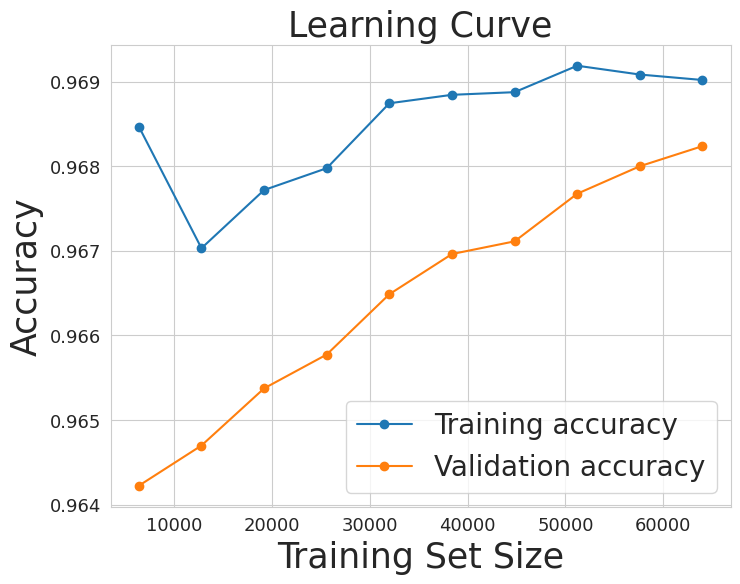

In [ ]:
svm_model=svm.SVC(C=10, gamma= 'scale', kernel='rbf', probability=True,random_state=123)
plot_learning_curve(svm_model, X_train_scaled, y_train)

KNN curve

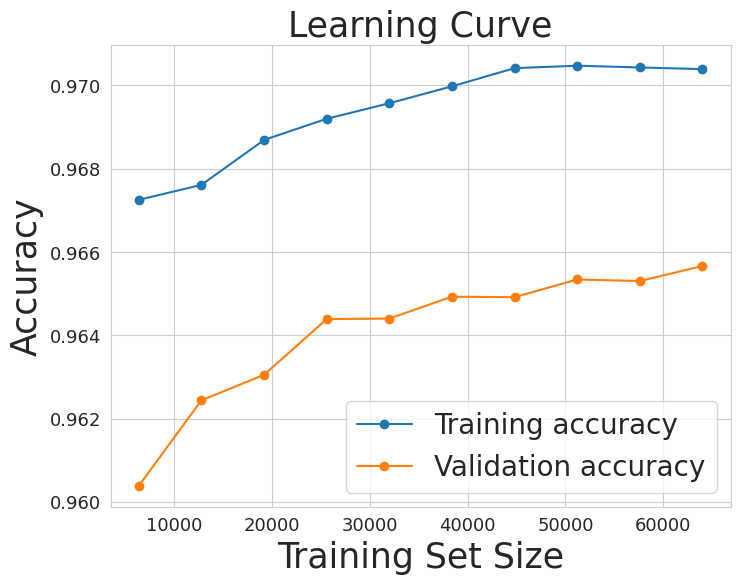

In [ ]:
knn_model=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 7, weights='uniform')
plot_learning_curve(knn_model, X_train_scaled, y_train)